In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter = 1000, tol=1e-3, 
                     random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

2.8.0 2.8.0


## Classification Model using Sequential API

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def images(no_of_images=25):
    row, col = int(math.sqrt(no_of_images)), int(math.sqrt(no_of_images))
    fig, subplots = plt.subplots(nrows=row, ncols=col)
    fig.set_figheight(int(no_of_images/4))
    fig.set_figwidth(int(no_of_images/4))
    for r_plot in subplots:
        for plot in r_plot:
            r_in = random.randint(0, 59999)
            plot.imshow(X_train_full[r_in], cmap=plt.cm.binary)
            plot.set_title(class_names[y_train_full[r_in]])
            plot.axis(False)

In [ ]:
# Importing Keras
from tensorflow import keras

# Loading Dataset from Keras
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# checking shape of data
X_train_full.shape, X_train_full.dtype

# Creating Validation dataset
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-Shirts/Top", "Trousers", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneakers", "Bag", "Ankle Boot"]

4431872/4422102 [==============================] - 0s 0us/step


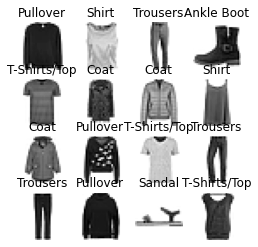

In [ ]:
images(18)

In [ ]:
# Creating the model using Sequential API
model = keras.Sequential()  # Defining model
# Flatten(Make it 1D array) the Input because our image is 28 x 28 matrices
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# Dense(Fully Connected Layer) with relu activation
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # Output Layer

In [3]:
## Another way to use Sequential API
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28), name="input_layer"), 
        keras.layers.Dense(300, activation="relu", name="hidden_layer_1"), 
        keras.layers.Dense(200, activation="relu", name="hidden_layer_2"), 
        keras.layers.Dense(10, activation="softmax", name="output_layer")
])

In [4]:
# Get model Info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               60200     
                                                                 
 output_layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get Model's Layer
model.layers

In [ ]:
# Get Model's Specific Layer
model.layers[1].name

'hidden_layer_1'

In [ ]:
# Get Model's Layer By name
model.get_layer("hidden_layer_1").name

'hidden_layer_1'

In [7]:
# Getting Parameters(Weights and biasas) of model
hidden_1 = model.get_layer("hidden_layer_1")
weights, biases = hidden_1.get_weights()
weights[:5], weights.shape, biases[:5], biases.shape

(array([[ 0.0683558 , -0.03413387, -0.04048367, ..., -0.05799189,
          0.0603157 ,  0.02894163],
        [-0.01974002,  0.04897684, -0.06380622, ...,  0.07148272,
         -0.03229299, -0.03449725],
        [-0.01394694,  0.03245664, -0.05953439, ..., -0.03907236,
          0.04657439,  0.01782626],
        [-0.0440484 , -0.01502017,  0.00651875, ...,  0.04803076,
          0.02162305, -0.06892921],
        [ 0.01455132, -0.01745728, -0.05725405, ..., -0.03414634,
         -0.02056236, -0.05788424]], dtype=float32),
 (784, 300),
 array([0., 0., 0., 0., 0.], dtype=float32),
 (300,))

In [ ]:
# Compiling The Model
model.compile(loss="sparse_categorical_crossentropy", # loss function
              optimizer="sgd", # optimizer
              metrics=["accuracy"] # Performance Metric
)

In [ ]:
# Training the Model And saving the history
history = model.fit(x=X_train, y=y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7200 - accuracy: 0.7651 - val_loss: 0.5204 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4890 - accuracy: 0.8297 - val_loss: 0.4544 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4440 - accuracy: 0.8461 - val_loss: 0.4141 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4160 - accuracy: 0.8551 - val_loss: 0.4241 - val_accuracy: 0.8560
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3966 - accuracy: 0.8594 - val_loss: 0.4058 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3804 - accuracy: 0.8658 - val_loss: 0.3721 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8704 - val_loss: 0.3931 - val_accuracy:

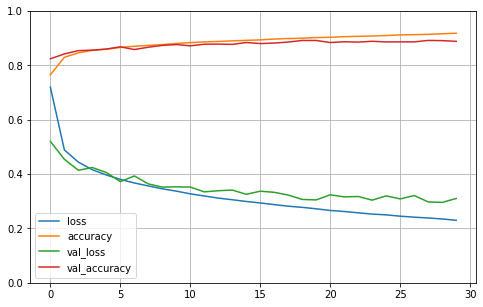

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 71.6653 - accuracy: 0.8324


[71.66531372070312, 0.8324000239372253]

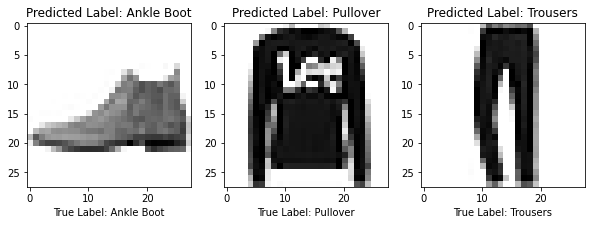

In [ ]:
import numpy as np

X_new = X_test[:3]
y_prob = model.predict(X_new)
y_pred = np.argmax(y_prob, axis=1)

fig, subplots = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(10)
for i, plot in enumerate(subplots):
    plot.imshow(X_new[i], cmap=plt.cm.binary)
    # plot.axis(False)
    plot.set_title("Predicted Label: {}".format(class_names[y_pred[i]]))
    plot.set_xlabel("True Label: {}".format(class_names[y_test[i]]))

## Regression Model using Sequential API

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing  = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
        keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20, 
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
mse_test, y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2703 - val_loss: 0.5808
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5232 - val_loss: 0.5124
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4786 - val_loss: 0.4702
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4441 - val_loss: 0.4464
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4262 - val_loss: 0.4301
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4147 - val_loss: 0.4170
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4051 - val_loss: 0.4103
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3980 - val_loss: 0.4176
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3937 - val_loss: 0.3999
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3889 - val_loss: 0.4005

(0.3728908896446228, array([[291.1767 ],
        [174.27556],
        [216.81638]], dtype=float32))

In [ ]:
mse_test, y_pred

(0.3728908896446228, array([[291.1767 ],
        [174.27556],
        [216.81638]], dtype=float32))

## Functional API

In [ ]:
from tensorflow import keras

input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], 
                           outputs=[output])

In [ ]:
# Sending a Input as parts
from tensorflow import keras
input_A = keras.layers.Input(shape=(5,))
input_B = keras.layers.Input(shape=(6,))
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], 
                           outputs=[output])
model.compile(loss="mae", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 28113.2148 - accuracy: 0.0016 - val_loss: 13251.6973 - val_accuracy: 0.0000e+00
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 10374.8662 - accuracy: 0.0013 - val_loss: 11338.9512 - val_accuracy: 0.0036
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 10354.8711 - accuracy: 0.0010 - val_loss: 5740.3843 - val_accuracy: 0.0036
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 10365.8916 - accuracy: 0.0016 - val_loss: 3103.3108 - val_accuracy: 0.0036
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 10345.0225 - accuracy: 0.0014 - val_loss: 14662.6973 - val_accuracy: 0.0036
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 10420.4668 - accuracy: 0.0013 - val_loss: 2275.7214 - val_accuracy: 0.0036
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 10304.3428 - accuracy: 0.

In [ ]:
mse_test

nan

In [ ]:
# Model with more output
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A, hidden_2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden_2)
model = keras.models.Model(inputs=[input_A, input_B], 
                           outputs=[output, aux_output])
model.compile(loss="mae", optimizer="sgd", 
              loss_weights=[0.9, 0.1])
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 9682.3770 - dense_42_loss: 10742.8535 - dense_43_loss: 138.0936 - val_loss: 9276.1475 - val_dense_42_loss: 10306.6406 - val_dense_43_loss: 1.7283
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 8545.9893 - dense_42_loss: 9495.3584 - dense_43_loss: 1.6746 - val_loss: 20998.8613 - val_dense_42_loss: 23331.9062 - val_dense_43_loss: 1.3962
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 8569.3799 - dense_42_loss: 9521.3926 - dense_43_loss: 1.2601 - val_loss: 8655.0381 - val_dense_42_loss: 9616.5771 - val_dense_43_loss: 1.1780
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 8533.7959 - dense_42_loss: 9481.8613 - dense_43_loss: 1.0939 - val_loss: 1848.0286 - val_dense_42_loss: 2053.2483 - val_dense_43_loss: 1.0532
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 8544.6396 - dense_42_loss: 9493.9316 - dense_43_loss: 0.

## Using Subclassing API

In [ ]:
from tensorflow import keras

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_ouptut = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_ouptut(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [ ]:
model.compile(loss="mae", 
              optimizer="sgd", 
              metrics=["accuracy"])
model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 10378.7803 - accuracy: 0.0015
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 10345.1504 - accuracy: 0.0012
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 10399.8369 - accuracy: 0.0017
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 10391.1143 - accuracy: 0.0015
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 10350.0781 - accuracy: 0.0015
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 10363.9902 - accuracy: 8.6133e-04
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 10361.1924 - accuracy: 0.0021
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 10402.8857 - accuracy: 0.0020
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 10352.9482 - accuracy: 0.0015
Epoch 10/20
363/363 [==============================] - 1s 1m

## Saving the model

In [ ]:
# Saving the model
model.save("my_model.h5")

# Loading the model
my_model = keras.models.load_model("my_model.h5")

## Using Callbacks

In [ ]:
def WideAndDeep(units=30):
    input = keras.layers.Input(shape=X_train.shape[1:])
    hidden1 = keras.layers.Dense(units, activation="relu")(input)
    hidden2 = keras.layers.Dense(units, activation="relu")(hidden1)
    concat = keras.layers.Concatenate()([input, hidden2])
    output = keras.layers.Dense(1)(concat)
    model = keras.models.Model(inputs=[input], 
                            outputs=[output])
    model.compile(loss="mae", optimizer="sgd", metrics=["accuracy"])
    return model

In [ ]:
model = WideAndDeep()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 11958.0693 - accuracy: 0.0015 - val_loss: 17613.9023 - val_accuracy: 0.0023
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 10606.3555 - accuracy: 0.0013 - val_loss: 10592.8975 - val_accuracy: 0.0000e+00
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 10607.8740 - accuracy: 0.0018 - val_loss: 10723.6875 - val_accuracy: 0.0023
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 10576.3916 - accuracy: 0.0018 - val_loss: 8800.6338 - val_accuracy: 0.0023
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 10541.7051 - accuracy: 0.0014 - val_loss: 7786.0259 - val_accuracy: 0.0000e+00
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 10621.0518 - accuracy: 0.0013 - val_loss: 5181.9385 - val_accuracy: 0.0023
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 10606.5068 - accuracy

In [ ]:
model = WideAndDeep()
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5")
model.fit(X_train, y_train, 
          epochs=100, 
          validation_data=(X_valid, y_valid), 
          callbacks=[early_stopping, checkpoint_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3404811970019328.0000 - accuracy: 0.0012 - val_loss: 32661.5215 - val_accuracy: 0.0000e+00
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 11051.8916 - accuracy: 0.0015 - val_loss: 19607.8262 - val_accuracy: 0.0000e+00
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 10366.1738 - accuracy: 0.0016 - val_loss: 4539.9214 - val_accuracy: 0.0036
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 10381.0820 - accuracy: 0.0012 - val_loss: 17043.3984 - val_accuracy: 0.0036
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 10315.6865 - accuracy: 9.4746e-04 - val_loss: 13574.1611 - val_accuracy: 0.0036
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 10354.4668 - accuracy: 0.0011 - val_loss: 15639.4209 - val_accuracy: 0.0036
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - los

In [ ]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 1ms/step - loss: 1261.7394 - accuracy: 0.0000e+00


[1261.7393798828125, 0.0]

In [ ]:
# Custom Callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:2f}".format(logs["val_loss"]/logs["loss"]))

model = WideAndDeep()
vnt_ratio = PrintValTrainRatioCallback()
model.fit(X_train, y_train, epochs=100, 
          validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, 
                     early_stopping, 
                     vnt_ratio])

Epoch 1/100
349/363 [===========================>..] - ETA: 0s - loss: 18083.1348 - accuracy: 0.0014
val/train: 0.171441
363/363 [==============================] - 1s 2ms/step - loss: 17799.0840 - accuracy: 0.0016 - val_loss: 3051.4973 - val_accuracy: 0.0000e+00
Epoch 2/100
336/363 [==========================>...] - ETA: 0s - loss: 10517.1699 - accuracy: 0.0020
val/train: 1.738182
363/363 [==============================] - 1s 2ms/step - loss: 10560.8271 - accuracy: 0.0019 - val_loss: 18356.6445 - val_accuracy: 0.0000e+00
Epoch 3/100
348/363 [===========================>..] - ETA: 0s - loss: 10551.6602 - accuracy: 0.0018
val/train: 1.099963
363/363 [==============================] - 1s 2ms/step - loss: 10619.6289 - accuracy: 0.0018 - val_loss: 11681.1963 - val_accuracy: 0.0000e+00
Epoch 4/100
362/363 [============================>.] - ETA: 0s - loss: 10513.7168 - accuracy: 0.0018
val/train: 0.618186
363/363 [==============================] - 1s 2ms/step - loss: 10518.8086 - accuracy: 0.

## Tensorboard

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
        keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=200, 
                    validation_data=(X_valid_scaled, y_valid), 
                    callbacks=[early_stopping, tensorboard_cb])

Epoch 1/200
363/363 [==============================] - 6s 12ms/step - loss: 1.0140 - accuracy: 0.0028 - val_loss: 1.8419 - val_accuracy: 0.0026
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 1.2072 - accuracy: 0.0030 - val_loss: 0.5464 - val_accuracy: 0.0026
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.0030 - val_loss: 0.4729 - val_accuracy: 0.0026
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.0030 - val_loss: 0.4380 - val_accuracy: 0.0026
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.0030 - val_loss: 0.4214 - val_accuracy: 0.0026
Epoch 6/200
363/363 [==============================] - 0s 852us/step - loss: 0.4206 - accuracy: 0.0030 - val_loss: 0.4113 - val_accuracy: 0.0026
Epoch 7/200
363/363 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.0030 - val_loss: 0.4026 - val_accuracy: 0.0

In [ ]:
%load_ext tensorboard
%tensorboard --logdir my_logs

Reusing TensorBoard on port 6006 (pid 1612), started 3 days, 10:31:55 ago. (Use '!kill 1612' to kill it.)

In [ ]:
from tensorboard import notebook
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir my_logs (started 3 days, 10:35:50 ago; port 6006, pid 1612).


## Tuning Hyperparamters

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3, input_shape=[8]):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    for layers in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100, 
            validation_data=(X_valid, y_valid), 
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 751us/step - loss: 511355853471744.0000 - val_loss: 928366657536.0000
Epoch 2/100
363/363 [==============================] - 0s 555us/step - loss: 490541481984.0000 - val_loss: 217016369152.0000
Epoch 3/100
363/363 [==============================] - 0s 574us/step - loss: 114669756416.0000 - val_loss: 50730037248.0000
Epoch 4/100
363/363 [==============================] - 0s 624us/step - loss: 26805366784.0000 - val_loss: 11858742272.0000
Epoch 5/100
363/363 [==============================] - 0s 671us/step - loss: 6266070016.0000 - val_loss: 2772119040.0000
Epoch 6/100
363/363 [==============================] - 0s 709us/step - loss: 1464766592.0000 - val_loss: 648014912.0000
Epoch 7/100
363/363 [==============================] - 0s 596us/step - loss: 342405920.0000 - val_loss: 151480736.0000
Epoch 8/100
363/363 [==============================] - 0s 621us/step - loss: 80041192.0000 - val_loss: 35410396.0000
Epoch 9/100
363/363 [==

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
                "n_hidden": [0, 1, 2, 3], 
                "n_neurons": np.arange(1, 100), 
                "learning_rate": reciprocal(3e-4, 3e-2), 
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                validation_data=(X_valid, y_valid), 
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 783us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/s

C:\Users\SG704\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [        nan -1.33604105         nan         nan         nan         nan
         nan         nan         nan         nan]
  category=UserWarning,


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3.9469 - val_loss: 2.7956
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 2.2103 - val_loss: 1.8356
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 1.6294 - val_loss: 1.5137
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4347 - val_loss: 1.4045
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3691 - val_loss: 1.3676
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3474 - val_loss: 1.3551
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3399 - val_loss: 1.3505
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3373 - val_loss: 1.3488
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3365 - val_loss: 1.3483
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3362 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000167D9B33588>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000167DAD63048>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.0007521502841201217, 'n_hidden': 3, 'n_neurons': 3}

In [ ]:
model = rnd_search_cv.best_estimator_
rnd_search_cv.best_params_, rnd_search_cv.best_score_

({'learning_rate': 0.0007521502841201217, 'n_hidden': 3, 'n_neurons': 3},
 -1.3360410531361897)

## Exercise

In [ ]:
from tensorflow import keras

model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,), name="Input_layer"), 
    keras.layers.Dense(50, activation="relu", name="Hidden_layer"), 
    keras.layers.Dense(3, activation="relu", name="Output_layer")
], name="Model_6")

In [ ]:
model_6.weights[2]

<tf.Variable 'Output_layer/kernel:0' shape=(50, 3) dtype=float32, numpy=
array([[ 0.05986616, -0.26919204, -0.3178979 ],
       [ 0.17057982, -0.03633001,  0.16913971],
       [ 0.3071992 , -0.21047239, -0.23410669],
       [-0.27393347, -0.13299774, -0.27095366],
       [ 0.04353073,  0.23908743, -0.3033835 ],
       [-0.17217523, -0.15673827, -0.23850118],
       [-0.1711055 ,  0.3022934 , -0.06058443],
       [-0.08369997, -0.26040605,  0.24610916],
       [ 0.19319054,  0.11778265, -0.27708185],
       [ 0.2144604 , -0.31775782,  0.33248803],
       [ 0.25455096,  0.23562983, -0.0843727 ],
       [-0.09475304, -0.3187511 ,  0.25575903],
       [ 0.1927264 ,  0.10505077,  0.06351164],
       [-0.15184161, -0.14081998,  0.22880527],
       [ 0.27686575,  0.1092633 ,  0.06279585],
       [ 0.17501834, -0.13821255,  0.18205687],
       [-0.12150218,  0.2700313 ,  0.1854609 ],
       [-0.2098766 , -0.23710456,  0.09555644],
       [ 0.09100994,  0.09485555, -0.06919795],
       [-0.3284

In [ ]:
train, test = keras.datasets.mnist.load_data()
X_train, y_train = train
X_test, y_test = test
X_train, y_train, X_val, y_val = X_train[:50000], y_train[:50000], X_train[50000:], y_train[50000:]

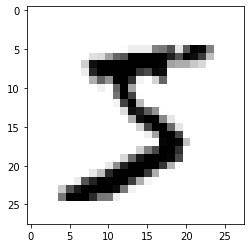

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(X_train[0]), cmap=plt.cm.binary)



In [ ]:
inputs = keras.layers.Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(300, activation="relu")(x)
x = keras.layers.Dense(100, activation="relu")(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
mnist_model = keras.models.Model(inputs=inputs, outputs=outputs)

mnist_model.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="adam", 
                    metrics=["accuracy"])


In [ ]:
model_checkpoint = keras.callbacks.ModelCheckpoint("mnsit_model.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
mnist_history = mnist_model.fit(X_train, y_train, 
                epochs=100, 
                validation_data=(X_val, y_val), 
                callbacks=[model_checkpoint, early_stopping, tensorboard_cb]
                )

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0611 - accuracy: 0.9864 - val_loss: 0.1896 - val_accuracy: 0.9706
Epoch 2/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0569 - accuracy: 0.9877 - val_loss: 0.2935 - val_accuracy: 0.9673
Epoch 3/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9861 - val_loss: 0.2057 - val_accuracy: 0.9736
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9876 - val_loss: 0.2398 - val_accuracy: 0.9684
Epoch 5/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0596 - accuracy: 0.9868 - val_loss: 0.2983 - val_accuracy: 0.9647
Epoch 6/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0667 - accuracy: 0.9853 - val_loss: 0.2446 - val_accuracy: 0.9719
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0574 - accuracy: 0.9879 - val_loss: 0.2647 - val_ac

<AxesSubplot:>

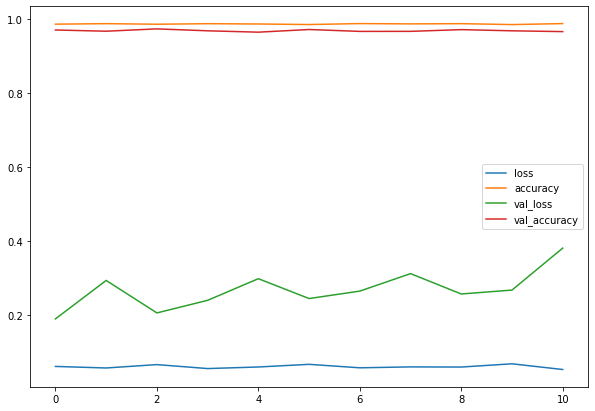

In [ ]:

import pandas as pd
pd.DataFrame(mnist_history.history).plot(figsize=(10, 7))

In [ ]:
mnist_model.evaluate(X_val, y_val)

313/313 [==============================] - 0s 929us/step - loss: 0.3809 - accuracy: 0.9662


[0.3809444010257721, 0.9661999940872192]

In [ ]:
%load_ext tensorboard

%tensorboard --logdir my_logs

In [ ]:
from tensorboard import notebook
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir my_logs (started 0:01:02 ago; port 6006, pid 12972).
